In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [367]:
sns.set_theme(style='whitegrid', color_codes=True)
sns.set_palette('tab20b')
#rocket tab20c Purples 
#sns.color_palette("Set2")

In [2]:
df = pd.read_csv('EPL_20_21.csv')


<h2>Data Exploration

In [4]:
df.head(3)

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0


In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,532.0,25.500000,4.319404,16.0,22.00,26.00,29.000,38.00
Matches,532.0,19.535714,11.840459,1.0,9.00,21.00,30.000,38.00
Starts,532.0,15.714286,11.921161,0.0,4.00,15.00,27.000,38.00
Mins,532.0,1411.443609,1043.171856,1.0,426.00,1345.00,2303.500,3420.00
Goals,532.0,1.853383,3.338009,0.0,0.00,1.00,2.000,23.00
Assists,532.0,1.287594,2.095191,0.0,0.00,0.00,2.000,14.00
Passes_Attempted,532.0,717.750000,631.372522,0.0,171.50,573.50,1129.500,3214.00
Perc_Passes_Completed,532.0,77.823872,13.011631,-1.0,73.50,79.20,84.625,100.00
Penalty_Goals,532.0,0.191729,0.850881,0.0,0.00,0.00,0.000,9.00
Penalty_Attempted,532.0,0.234962,0.975818,0.0,0.00,0.00,0.000,10.00


In [6]:
df.columns

Index(['Name', 'Club', 'Nationality', 'Position', 'Age', 'Matches', 'Starts',
       'Mins', 'Goals', 'Assists', 'Passes_Attempted', 'Perc_Passes_Completed',
       'Penalty_Goals', 'Penalty_Attempted', 'xG', 'xA', 'Yellow_Cards',
       'Red_Cards'],
      dtype='object')

In [7]:
np.size(df.columns)

18

In [8]:
df.shape

(532, 18)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   532 non-null    object 
 1   Club                   532 non-null    object 
 2   Nationality            532 non-null    object 
 3   Position               532 non-null    object 
 4   Age                    532 non-null    int64  
 5   Matches                532 non-null    int64  
 6   Starts                 532 non-null    int64  
 7   Mins                   532 non-null    int64  
 8   Goals                  532 non-null    int64  
 9   Assists                532 non-null    int64  
 10  Passes_Attempted       532 non-null    int64  
 11  Perc_Passes_Completed  532 non-null    float64
 12  Penalty_Goals          532 non-null    int64  
 13  Penalty_Attempted      532 non-null    int64  
 14  xG                     532 non-null    float64
 15  xA    

In [11]:
df.duplicated().any()

False

In [14]:
df.isnull().sum()

Name                     0
Club                     0
Nationality              0
Position                 0
Age                      0
Matches                  0
Starts                   0
Mins                     0
Goals                    0
Assists                  0
Passes_Attempted         0
Perc_Passes_Completed    0
Penalty_Goals            0
Penalty_Attempted        0
xG                       0
xA                       0
Yellow_Cards             0
Red_Cards                0
dtype: int64

In [17]:
df.isnull().any()

Name                     False
Club                     False
Nationality              False
Position                 False
Age                      False
Matches                  False
Starts                   False
Mins                     False
Goals                    False
Assists                  False
Passes_Attempted         False
Perc_Passes_Completed    False
Penalty_Goals            False
Penalty_Attempted        False
xG                       False
xA                       False
Yellow_Cards             False
Red_Cards                False
dtype: bool

<h4>Data is cleaned not have missing data or duplicates

<h3>Prepare data for analysis

<h4>Number of minutes in each match

In [19]:
df['MinPerMatch'] = (df['Mins'] / df['Matches']).astype(float)
df['MinPerMatch']


0      80.277778
1      88.548387
2      74.342857
3      84.666667
4      74.156250
         ...    
527    26.909091
528    90.000000
529    12.000000
530    11.000000
531     1.000000
Name: MinPerMatch, Length: 532, dtype: float64

<h4>Number of goal in each match

In [20]:
df['GoalsPerMatch'] = (df['Goals'] / df['Matches']).astype(float)
df['GoalsPerMatch']


0      0.166667
1      0.000000
2      0.171429
3      0.111111
4      0.031250
         ...   
527    0.000000
528    0.000000
529    0.000000
530    0.000000
531    0.000000
Name: GoalsPerMatch, Length: 532, dtype: float64

In [22]:
df.head(2)

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinPerMatch,GoalsPerMatch
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0,80.277778,0.166667
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0,88.548387,0.000000


In [31]:
# Number of Players' Names 

totalNames = np.size(df.Name.unique())
totalNames


524

In [46]:
# Total numbers of goals
totalGoals = df.Goals.sum()
totalGoals


986

In [106]:
# Total Penalty Goals 
totalPenalty_goal = df.Penalty_Goals.sum()
totalPenalty_goal


102

In [107]:
# Total goals without Penalty
totalGoals - totalPenalty_goal


884

In [54]:
# total penalty attempted
totalPenaltyAttempted = df.Penalty_Attempted.sum()
totalPenaltyAttempted

125

In [112]:
# Total Panalty Miss
TotalPanaltyMiss = totalPenaltyAttempted - totalPenalty_goal
TotalPanaltyMiss


23

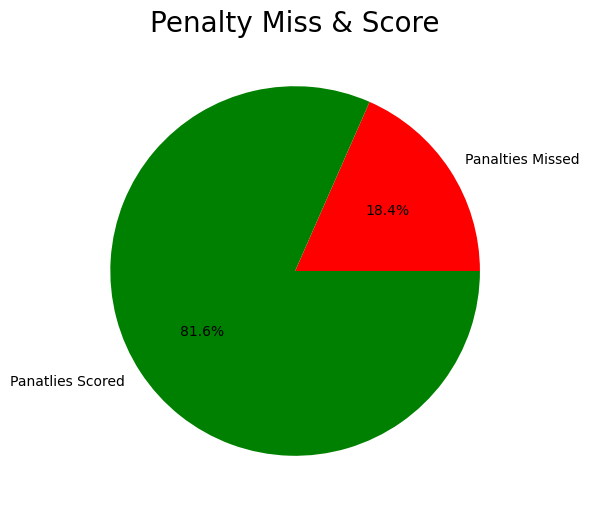

In [126]:
data = [TotalPanaltyMiss, totalPenalty_goal]
plt.figure(figsize = (13, 6))

plt.pie(data, labels = ['Panalties Missed','Panatlies Scored'], colors = ['Red', 'Green'] ,autopct='%1.1f%%')#, shadow = True)
plt.title('Penalty Miss & Score', fontsize = 20)
plt.show()

<h1>Positions

In [111]:
df.Position.unique()

array(['MF,FW', 'GK', 'FW', 'DF', 'MF', 'FW,MF', 'FW,DF', 'DF,MF',
       'MF,DF', 'DF,FW'], dtype=object)

In [127]:
df.Position.value_counts()

DF       178
MF       108
FW        81
FW,MF     47
GK        42
MF,FW     36
DF,MF     15
MF,DF     13
FW,DF      6
DF,FW      6
Name: Position, dtype: int64

Text(0.5, 1.0, 'Total Players with position groups')

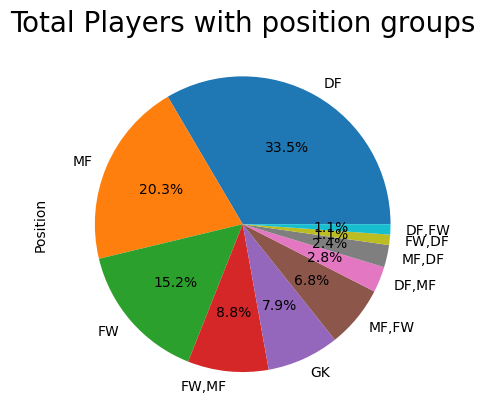

In [133]:
df.Position.value_counts().plot(kind='pie', autopct='%1.1f%%')#, startangle = 260)
plt.title('Total Players with position groups', fontsize = 20)


<h3>Player data with 'DF' Position 

In [134]:
df[df.Position == 'DF']

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinPerMatch,GoalsPerMatch
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0,84.666667,0.111111
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0,74.156250,0.031250
5,César Azpilicueta,Chelsea,ESP,DF,30,26,24,2188,1,2,2015,87.5,0,0,0.03,0.11,5,1,84.153846,0.038462
8,Thiago Silva,Chelsea,BRA,DF,35,23,23,1935,2,0,1871,93.5,0,0,0.05,0.02,5,1,84.130435,0.086957
9,Kurt Zouma,Chelsea,FRA,DF,25,24,22,2029,5,0,1720,91.9,0,0,0.08,0.00,3,0,84.541667,0.208333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,Jack Robinson,Sheffield United,ENG,DF,26,11,9,877,0,1,439,80.6,0,0,0.04,0.09,3,0,79.727273,0.000000
524,Max Lowe,Sheffield United,ENG,DF,23,8,7,550,0,0,223,65.0,0,0,0.01,0.03,1,0,68.750000,0.000000
525,Phil Jagielka,Sheffield United,ENG,DF,37,10,6,526,0,0,186,76.3,0,0,0.00,0.00,1,1,52.600000,0.000000
528,Jack O'Connell,Sheffield United,ENG,DF,26,2,2,180,0,0,77,77.9,0,0,0.00,0.00,0,0,90.000000,0.000000


<h3>Players' name with 'MF' Position 

In [135]:
df[df.Position == 'MF'].Name

6        N'Golo Kanté
7            Jorginho
10      Mateo Kovačić
21      Billy Gilmour
26       Ross Barkley
            ...      
510        John Fleck
512    Oliver Norwood
514    John Lundstram
517      Sander Berge
529     Iliman Ndiaye
Name: Name, Length: 108, dtype: object

In [136]:
df.columns

Index(['Name', 'Club', 'Nationality', 'Position', 'Age', 'Matches', 'Starts',
       'Mins', 'Goals', 'Assists', 'Passes_Attempted', 'Perc_Passes_Completed',
       'Penalty_Goals', 'Penalty_Attempted', 'xG', 'xA', 'Yellow_Cards',
       'Red_Cards', 'MinPerMatch', 'GoalsPerMatch'],
      dtype='object')

<h3> Age

In [138]:
df.Age.value_counts().sort_index()

16     4
17     8
18    12
19    20
20    34
21    24
22    40
23    44
24    39
25    39
26    47
27    40
28    46
29    35
30    29
31    24
32    17
33    16
34     5
35     5
36     2
37     1
38     1
Name: Age, dtype: int64

In [142]:
df.Age.value_counts().sort_values(ascending =False).head(10)


26    47
28    46
23    44
22    40
27    40
24    39
25    39
29    35
20    34
30    29
Name: Age, dtype: int64

<h1>Nationality

<H3>All Nationalities of players

In [154]:
totalNation = df.Nationality.unique()
totalNation


array(['ENG', 'SEN', 'GER', 'ESP', 'FRA', 'ITA', 'BRA', 'CRO', 'USA',
       'DEN', 'MAR', 'SCO', 'ARG', 'POR', 'BEL', 'ALG', 'UKR', 'NED',
       'SWE', 'URU', 'SRB', 'WAL', 'CIV', 'NGA', 'EGY', 'TUR', 'CMR',
       'GUI', 'SUI', 'JPN', 'IRL', 'GRE', 'NIR', 'GHA', 'AUT', 'JAM',
       'RSA', 'CZE', 'POL', 'PAR', 'COD', 'KOR', 'COL', 'GAB', 'NOR',
       'AUS', 'BIH', 'ISL', 'MKD', 'BFA', 'ZIM', 'SVK', 'MEX', 'CAN',
       'MLI', 'IRN', 'NZL', 'MTN', 'SKN'], dtype=object)

In [155]:
# number of unique Nationalities
nationNum = np.size(totalNation)
nationNum


59

In [163]:
df.Nationality.value_counts().sort_values(ascending = False).head(10)

ENG    192
FRA     31
BRA     27
ESP     26
IRL     21
POR     21
SCO     20
NED     16
WAL     12
BEL     11
Name: Nationality, dtype: int64

<h2>Top 10 Nationalities have players

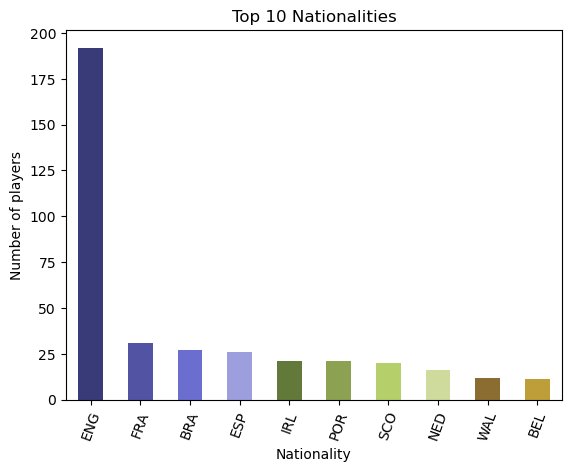

In [365]:
df.Nationality.value_counts().sort_values(ascending = False).head(10).plot(
                        kind = 'bar',  
                        title = 'Top 10 Nationalities', 
                        xlabel= 'Nationality', 
                        ylabel = 'Number of players',
                        color = sns.color_palette('tab20b'))
plt.xticks(rotation=70)
plt.show()

<h2>Club

In [173]:
# Total names of clubs

totalClubs = df.Club.unique()
totalClubs


array(['Chelsea', 'Manchester City', 'Manchester United', 'Liverpool FC',
       'Leicester City', 'West Ham United', 'Tottenham Hotspur',
       'Arsenal', 'Leeds United', 'Everton', 'Aston Villa',
       'Newcastle United', 'Wolverhampton Wanderers', 'Crystal Palace',
       'Southampton', 'Brighton', 'Burnley', 'Fulham',
       'West Bromwich Albion', 'Sheffield United'], dtype=object)

In [174]:
# Total number of clubs
numclubs = np.size(df.Club.unique())
numclubs


20

<h2>Number of players in each club

In [177]:
df.Club.value_counts().sort_values(ascending = False)

West Bromwich Albion       30
Manchester United          29
Arsenal                    29
Southampton                29
Everton                    29
Liverpool FC               28
Fulham                     28
Leicester City             27
Sheffield United           27
Wolverhampton Wanderers    27
Brighton                   27
Newcastle United           27
Chelsea                    27
Burnley                    25
Manchester City            24
Crystal Palace             24
Tottenham Hotspur          24
West Ham United            24
Aston Villa                24
Leeds United               23
Name: Club, dtype: int64

<h3>Top 10 Club with players

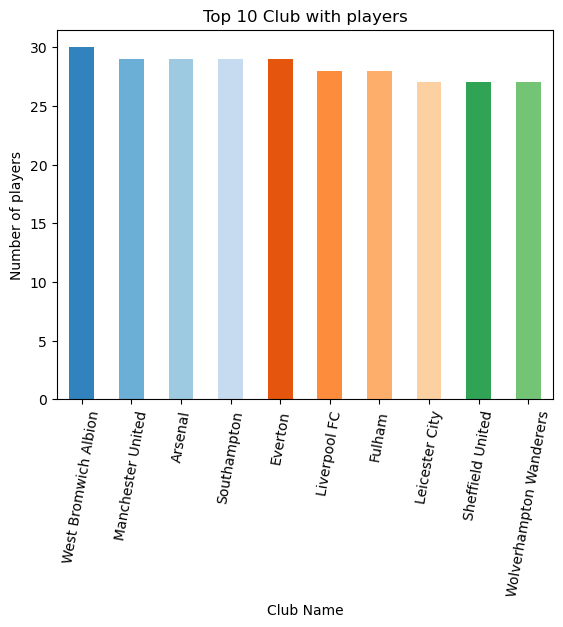

In [364]:
df.Club.value_counts().sort_values(ascending=False).head(10).plot(
    kind='bar', color=sns.color_palette('tab20c'), title='Top 10 Club with players',
    xlabel = 'Club Name', ylabel = 'Number of players')
plt.xticks(rotation=80)
plt.show()


<h2>Top clubs with different Nationalities</h2>

In [223]:
# count of unique nationalities in each club
Club_Nation = pd.pivot_table(df[['Nationality']], index=df['Club'],
               aggfunc = pd.Series.nunique).sort_values(by = ['Nationality'], ascending = False)

Club_Nation

#pd.pivot_table(df[['Nationality']], index=df['Club'], aggfunc = lambda x: len(x.unique()))


,Nationality
Club,
Liverpool FC,17
Fulham,17
Arsenal,16
Brighton,16
West Ham United,15
Leicester City,15
Wolverhampton Wanderers,14
Everton,14
Newcastle United,14


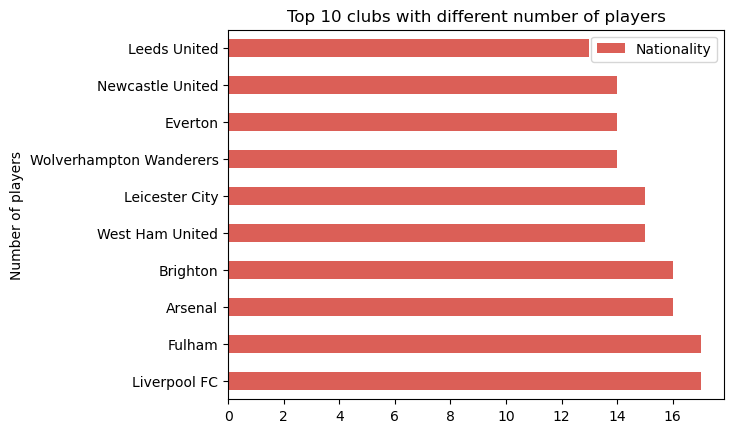

In [231]:
Club_Nation[:10].plot(kind = 'barh', title = 'Top 10 clubs with different number of players',
                      xlabel='Number of players', ylabel='Club Name', color=sns.color_palette('hls'))
plt.show()


<h2>Age

<h3>Range of ages 

In [234]:
# Player's age
minAge = min(df.Age)
maxAge = max(df.Age)
print("players' age between {} and {} ".format(minAge, maxAge))


players' age between 16 and 38 


<h3>Average of Ages 

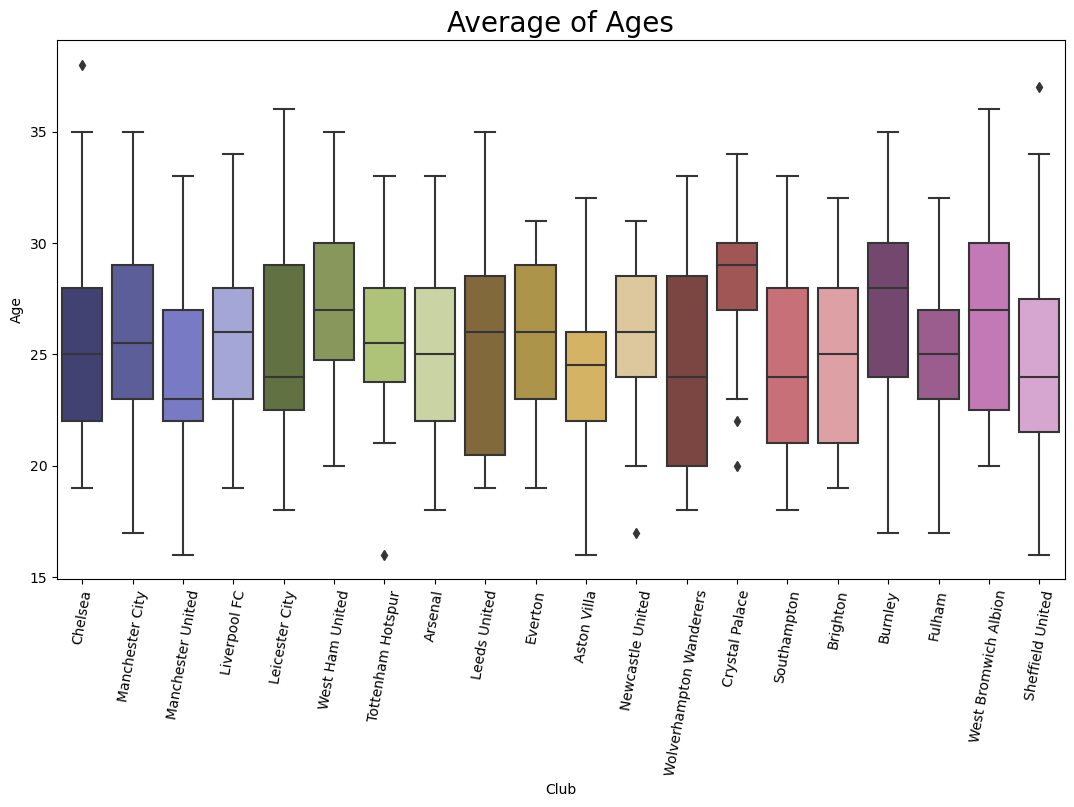

In [256]:
plt.figure(figsize=(13,7))
sns.boxplot(data=df, x='Club', y='Age')
plt.xticks(rotation = 80)
plt.title('Average of Ages', fontsize = 20)
plt.show()


<h3>Number players of each age 

In [259]:
df.Age.value_counts().sort_values(ascending = False)

26    47
28    46
23    44
22    40
27    40
24    39
25    39
29    35
20    34
30    29
21    24
31    24
19    20
32    17
33    16
18    12
17     8
34     5
35     5
16     4
36     2
38     1
37     1
Name: Age, dtype: int64

<h3>The top 10 ages in the number of players

In [273]:
age_df = df.Age.value_counts().sort_values(ascending = False)[:10].to_frame()
age_df

,Age
26,47
28,46
23,44
22,40
27,40
24,39
25,39
29,35
20,34
30,29


<h2>Average of Age in each club

In [278]:
(df.groupby('Club')['Age'].sum()/df.groupby('Club').size()).sort_values(ascending = False)


Club
Crystal Palace             28.333333
West Ham United            27.500000
Burnley                    27.040000
West Bromwich Albion       26.766667
Newcastle United           26.074074
Manchester City            25.708333
Tottenham Hotspur          25.625000
Chelsea                    25.592593
Leicester City             25.592593
Liverpool FC               25.571429
Everton                    25.413793
Leeds United               25.347826
Fulham                     25.035714
Arsenal                    24.965517
Sheffield United           24.814815
Brighton                   24.555556
Wolverhampton Wanderers    24.444444
Aston Villa                24.291667
Southampton                24.137931
Manchester United          23.862069
dtype: float64

<h2>Players above 30 in Arsenal

In [292]:
temp = df[df['Age'] > 30]
temp[temp['Club'] == 'Arsenal']


,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinPerMatch,GoalsPerMatch
187,Pierre-Emerick Aubameyang,Arsenal,GAB,FW,31,29,26,2332,10,3,691,75.0,2,2,0.41,0.11,2,0,80.413793,0.344828
196,David Luiz,Arsenal,BRA,DF,33,20,17,1396,1,0,965,83.6,0,0,0.06,0.03,1,1,69.800000,0.050000
198,Willian,Arsenal,BRA,"FW,MF",31,25,16,1406,1,5,787,79.3,0,0,0.13,0.16,0,0,56.240000,0.040000


<h2>Players with oldest age

In [313]:
df[df['Age'] == df.Age.max()]

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinPerMatch,GoalsPerMatch
22,Willy Caballero,Chelsea,ARG,GK,38,1,1,90,0,0,26,92.3,0,0,0.0,0.0,0,0,90.0,0.0


<H2>Players with youngest age

In [314]:
df[df['Age'] == df.Age.min()]

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinPerMatch,GoalsPerMatch
76,Shola Shoretire,Manchester United,ENG,FW,16,2,0,11,0,0,8,75.0,0,0,0.00,0.0,0,0,5.5,0.0
182,Dane Scarlett,Tottenham Hotspur,ENG,FW,16,1,0,1,0,0,0,-1.0,0,0,0.00,0.0,0,0,1.0,0.0
284,Carney Chukwuemeka,Aston Villa,ENG,"FW,MF",16,2,0,20,0,0,8,62.5,0,0,0.29,0.0,0,0,10.0,0.0
530,Antwoine Hackford,Sheffield United,ENG,"DF,FW",16,1,0,11,0,0,1,100.0,0,0,1.16,0.0,0,0,11.0,0.0


<h2> Total player in each club under 20

In [320]:
df[df.Age < 20]['Club'].value_counts(ascending=False)


Manchester United          7
Wolverhampton Wanderers    5
Sheffield United           4
Southampton                4
Aston Villa                3
Liverpool FC               3
Leicester City             3
Brighton                   2
Chelsea                    2
Manchester City            2
Arsenal                    2
Everton                    2
Newcastle United           1
Leeds United               1
Tottenham Hotspur          1
Burnley                    1
Fulham                     1
Name: Club, dtype: int64

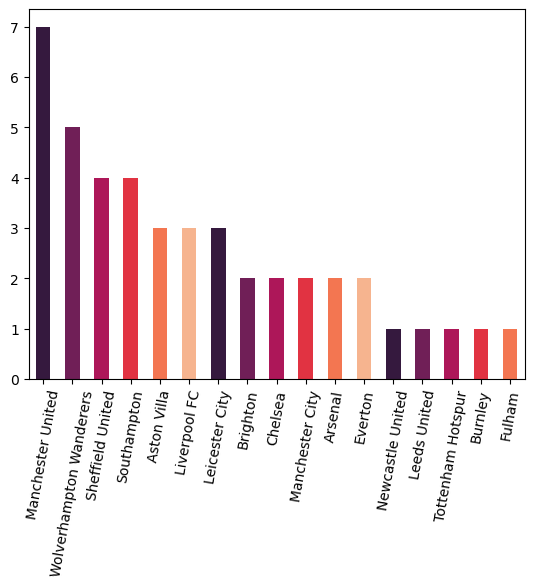

In [363]:
df[df.Age < 20 ]['Club'].value_counts(ascending = False).plot(kind = 'bar', color = sns.color_palette('rocket'))
plt.xticks(rotation=80)
plt.show()

<H2>Top 10 Country has most number players

In [302]:
nationByNumPlayers = df.pivot_table(df[['Name']], index = df['Nationality'] ,
               aggfunc = 'count').sort_values(by = ['Name'], ascending = False)[:10]
nationByNumPlayers

,Name
Nationality,
ENG,192
FRA,31
BRA,27
ESP,26
IRL,21
POR,21
SCO,20
NED,16
WAL,12


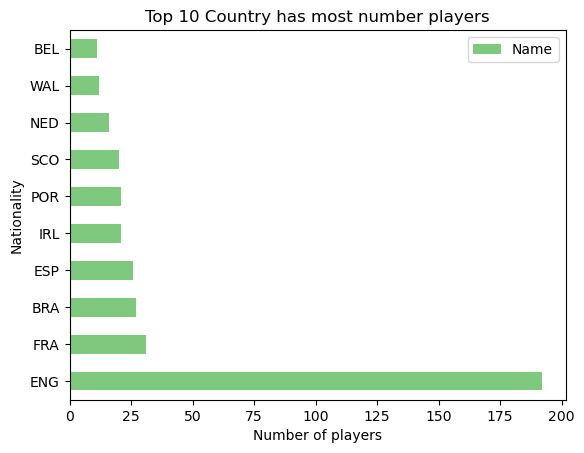

In [311]:
nationByNumPlayers.plot(kind = 'barh', color = sns.color_palette('Accent'),
                        title = 'Top 10 Country has most number players')
plt.xlabel('Number of players')
plt.show()

<h2>Clubs with least number of Players

In [330]:
nationByNumPlayers = df.pivot_table(df[['Name']], index=df['Nationality'],
                                    aggfunc='count').sort_values(by=['Name'])[:15]
nationByNumPlayers


,Name
Nationality,
ZIM,1
GUI,1
GRE,1
KOR,1
MEX,1
MKD,1
MTN,1
NZL,1
IRN,1


<h2> Total Goals, Assists and Yellow Cards for every Position

In [333]:
pd.pivot_table(df[['Goals' , 'Assists','Yellow_Cards']], index = df.Position, aggfunc = 'sum').sort_values(
                by = ['Goals' , 'Assists','Yellow_Cards'], ascending = False)

,Assists,Goals,Yellow_Cards
Position,,,
FW,172,442,100
MF,162,171,339
DF,136,129,443
"FW,MF",99,124,72
"MF,FW",68,83,51
"MF,DF",18,14,42
"DF,MF",12,11,36
"FW,DF",8,8,2
"DF,FW",8,3,9


<h2> Total Goals, Assists and Yellow Cards for every Club

In [334]:
pd.pivot_table(df[['Goals' , 'Assists','Yellow_Cards']], index = df.Club, aggfunc = 'sum').sort_values(
                by = ['Goals' , 'Assists','Yellow_Cards'], ascending = False)

,Assists,Goals,Yellow_Cards
Club,,,
Manchester City,55,82,46
Manchester United,51,70,64
Tottenham Hotspur,50,66,57
Liverpool FC,43,65,40
Leicester City,45,64,61
West Ham United,46,60,50
Leeds United,45,60,61
Chelsea,38,56,51
Arsenal,38,53,49


<h2>Goals and Assists for each club

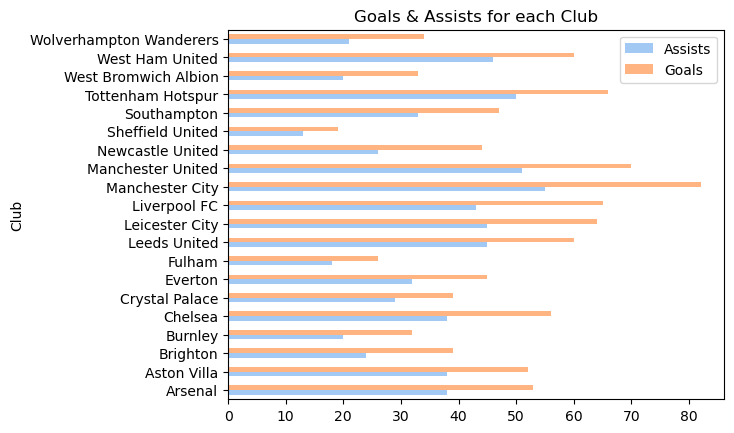

In [349]:
pd.pivot_table(df[['Goals', 'Assists']], index = df.Club, aggfunc = 'sum').plot(kind = 'barh', 
                                                                                color = sns.color_palette('pastel'),
                                                                                title = 'Goals & Assists for each Club') 
plt.show()

<H2>Assists

<h2>Total assists from each club

In [348]:
df.groupby('Club').Assists.sum()

Club
Arsenal                    38
Aston Villa                38
Brighton                   24
Burnley                    20
Chelsea                    38
Crystal Palace             29
Everton                    32
Fulham                     18
Leeds United               45
Leicester City             45
Liverpool FC               43
Manchester City            55
Manchester United          51
Newcastle United           26
Sheffield United           13
Southampton                33
Tottenham Hotspur          50
West Bromwich Albion       20
West Ham United            46
Wolverhampton Wanderers    21
Name: Assists, dtype: int64

<h2> Most Clubs making Assists

In [359]:
df.groupby('Club').Assists.sum().sort_values(ascending= False)

Club
Manchester City            55
Manchester United          51
Tottenham Hotspur          50
West Ham United            46
Leeds United               45
Leicester City             45
Liverpool FC               43
Aston Villa                38
Arsenal                    38
Chelsea                    38
Southampton                33
Everton                    32
Crystal Palace             29
Newcastle United           26
Brighton                   24
Wolverhampton Wanderers    21
Burnley                    20
West Bromwich Albion       20
Fulham                     18
Sheffield United           13
Name: Assists, dtype: int64

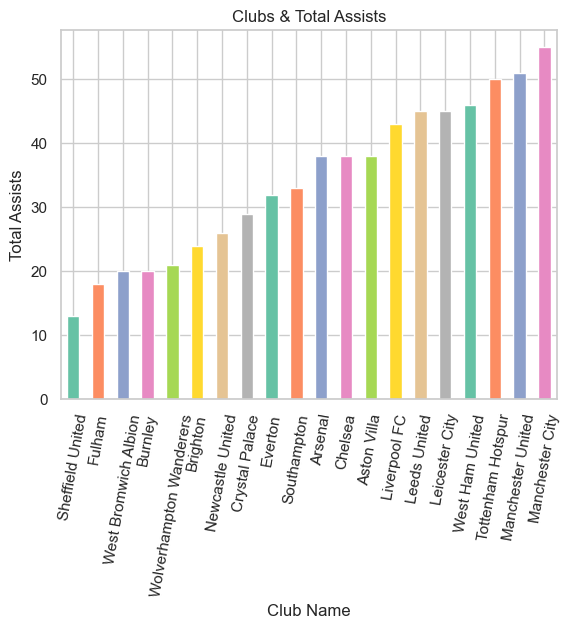

In [379]:
df.groupby('Club').Assists.sum().sort_values().plot(kind='bar', color = sns.color_palette("Set2"))
plt.xlabel('Club Name')
plt.ylabel('Total Assists')
plt.title('Clubs & Total Assists')
plt.xticks(rotation = 80)
plt.show()

<h2> Player mede max assists

In [381]:
df[ df.Assists == df.Assists.max()]

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinPerMatch,GoalsPerMatch
162,Harry Kane,Tottenham Hotspur,ENG,FW,27,35,35,3082,23,14,937,70.1,4,4,0.6,0.22,1,0,88.057143,0.657143


<h2> Player mede min assists

In [382]:
df[ df.Assists == df.Assists.min()]

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinPerMatch,GoalsPerMatch
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0,88.548387,0.000000
8,Thiago Silva,Chelsea,BRA,DF,35,23,23,1935,2,0,1871,93.5,0,0,0.05,0.02,5,1,84.130435,0.086957
9,Kurt Zouma,Chelsea,FRA,DF,25,24,22,2029,5,0,1720,91.9,0,0,0.08,0.00,3,0,84.541667,0.208333
11,Antonio Rüdiger,Chelsea,GER,DF,27,19,19,1710,1,0,1476,90.7,0,0,0.06,0.02,0,0,90.000000,0.052632
14,Andreas Christensen,Chelsea,DEN,DF,24,17,15,1371,0,0,1089,92.8,0,0,0.01,0.02,2,1,80.647059,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,Lys Mousset,Sheffield United,FRA,"FW,MF",24,11,2,296,0,0,50,80.0,0,0,0.22,0.10,0,0,26.909091,0.000000
528,Jack O'Connell,Sheffield United,ENG,DF,26,2,2,180,0,0,77,77.9,0,0,0.00,0.00,0,0,90.000000,0.000000
529,Iliman Ndiaye,Sheffield United,FRA,MF,21,1,0,12,0,0,3,100.0,0,0,0.00,0.00,0,0,12.000000,0.000000
530,Antwoine Hackford,Sheffield United,ENG,"DF,FW",16,1,0,11,0,0,1,100.0,0,0,1.16,0.00,0,0,11.000000,0.000000


<h2> Top 10 players making assists

In [388]:
df.groupby('Name')['Assists'].sum().sort_values(ascending = False)[:10]

Name
Harry Kane              14
Kevin De Bruyne         12
Bruno Fernandes         12
Jack Grealish           10
Son Heung-min           10
Jamie Vardy              9
Marcus Rashford          9
Raphael Dias Belloli     9
Timo Werner              8
Pascal Groß              8
Name: Assists, dtype: int64

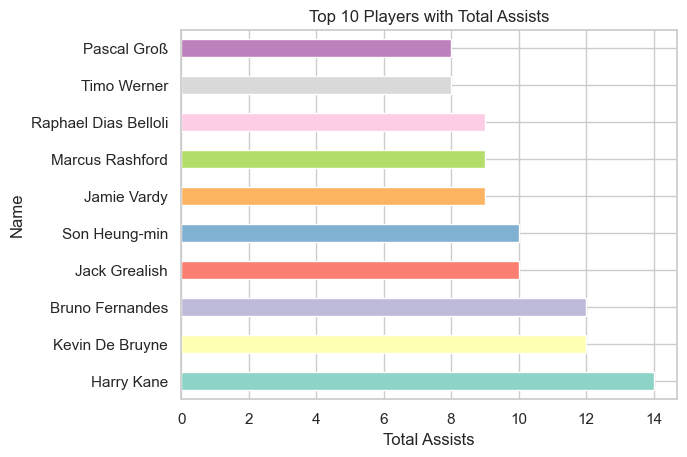

In [396]:
df.groupby('Name')['Assists'].sum().sort_values(ascending = False)[:10].plot(kind = 'barh', color = sns.color_palette('Set3'))
plt.xlabel('Total Assists')
plt.title('Top 10 Players with Total Assists')
plt.show()

In [391]:
df[['Name' , 'Club', 'Assists','Matches']].nlargest(n = 10, columns = 'Assists')

,Name,Club,Assists,Matches
162,Harry Kane,Tottenham Hotspur,14,35
34,Kevin De Bruyne,Manchester City,12,25
51,Bruno Fernandes,Manchester United,12,37
161,Son Heung-min,Tottenham Hotspur,10,37
273,Jack Grealish,Aston Villa,10,26
54,Marcus Rashford,Manchester United,9,37
110,Jamie Vardy,Leicester City,9,34
220,Raphael Dias Belloli,Leeds United,9,30
2,Timo Werner,Chelsea,8,35
136,Aaron Cresswell,West Ham United,8,36


<h2> Most Clubs scored Goals

In [400]:
df.groupby('Club')['Goals'].sum().sort_values(ascending = False)

Club
Manchester City            82
Manchester United          70
Tottenham Hotspur          66
Liverpool FC               65
Leicester City             64
Leeds United               60
West Ham United            60
Chelsea                    56
Arsenal                    53
Aston Villa                52
Southampton                47
Everton                    45
Newcastle United           44
Crystal Palace             39
Brighton                   39
Wolverhampton Wanderers    34
West Bromwich Albion       33
Burnley                    32
Fulham                     26
Sheffield United           19
Name: Goals, dtype: int64

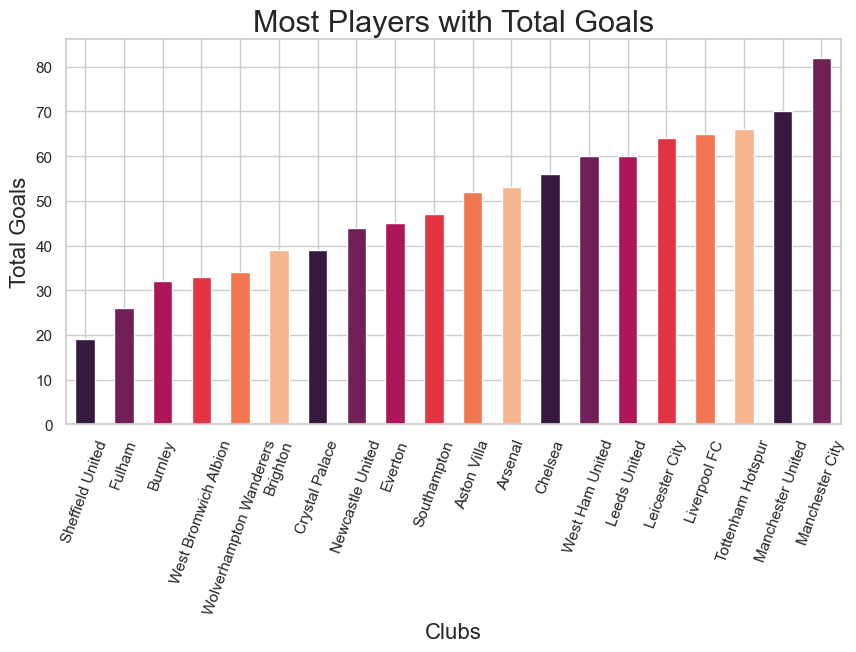

In [411]:
plt.figure(figsize=(10, 5))
df.groupby('Club')['Goals'].sum().sort_values().plot(kind = 'bar', color = sns.color_palette('rocket'))
plt.xlabel('Clubs', fontsize = 16)
plt.ylabel('Total Goals', fontsize = 16)
plt.title('Most Players with Total Goals', fontsize = 22)
plt.xticks(rotation = 70)
plt.show()

<h2> Goals with assist and without assists

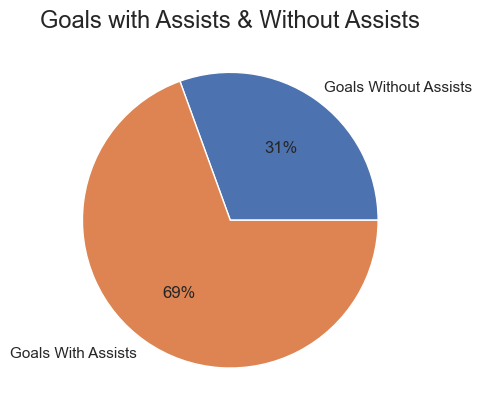

In [414]:

goalsWithAssists = df.Assists.sum()
goalsWithoutAssists = df.Goals.sum() - goalsWithAssists
data = [goalsWithoutAssists, goalsWithAssists]
labels = ['Goals Without Assists','Goals With Assists']
plt.pie(data, labels = labels,autopct="%.0f%%")
plt.title('Goals with Assists & Without Assists', fontsize = 17)
plt.show()

<h2>Total Cards for each Club

In [415]:
df['TotalCards'] = df.Red_Cards + df.Yellow_Cards

In [418]:
df.groupby('Club')['TotalCards'].sum().sort_values(ascending = False)

Club
Sheffield United           76
Aston Villa                75
Fulham                     70
Newcastle United           68
Manchester United          65
Leeds United               62
Everton                    61
Leicester City             61
Tottenham Hotspur          59
Crystal Palace             58
Wolverhampton Wanderers    56
Brighton                   55
West Bromwich Albion       55
Southampton                55
Arsenal                    54
Chelsea                    54
West Ham United            53
Manchester City            48
Burnley                    48
Liverpool FC               40
Name: TotalCards, dtype: int64

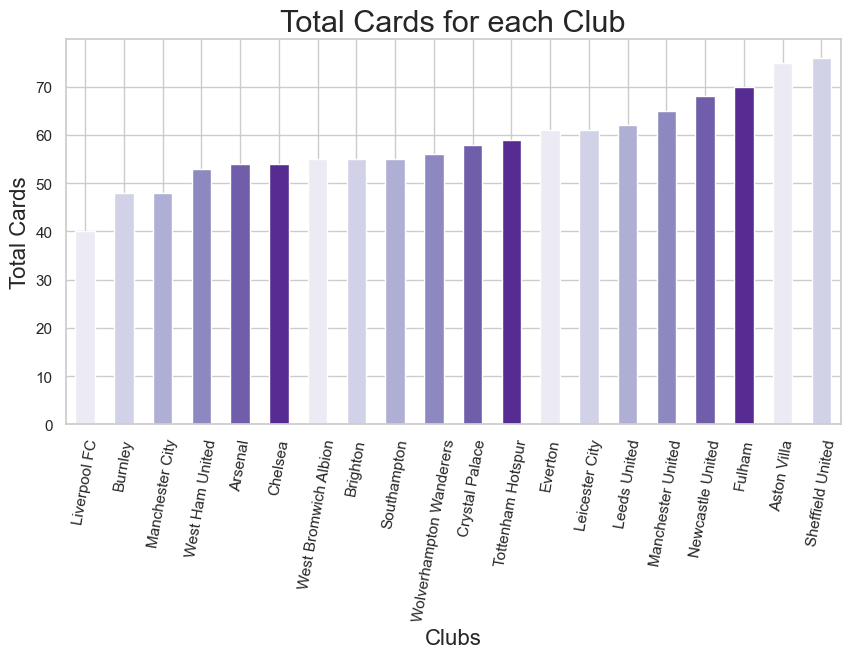

In [425]:
plt.figure(figsize = (10,5))
df.groupby('Club')['TotalCards'].sum().sort_values().plot(kind = 'bar', color = sns.color_palette('Purples'))
plt.xlabel('Clubs', fontsize = 16)
plt.ylabel('Total Cards', fontsize = 16)
plt.title('Total Cards for each Club', fontsize = 22)
plt.xticks(rotation = 80)
plt.show()

<h2>Top 10 players with most red cards

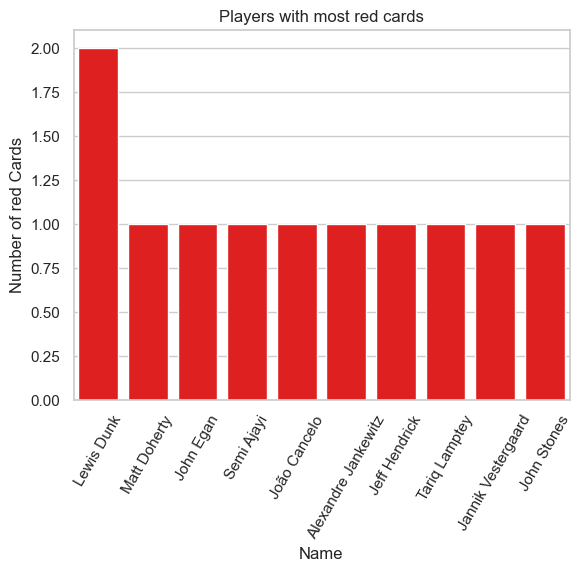

In [432]:
red_card = df.sort_values(by='Red_Cards', ascending=False)[:10]
plt.title('Players with most red cards')
c = sns.barplot(
    x=red_card['Name'], y=red_card['Red_Cards'], label="Players", color='red')
plt.ylabel('Number of red Cards')
plt.xticks(rotation = 60)
plt.show()


<h2>Top 10 players with most yellow cards

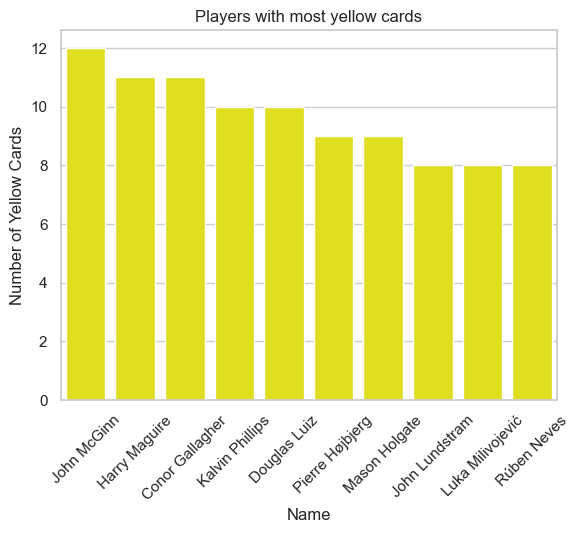

In [433]:
yellow_card = df.sort_values(by='Yellow_Cards',ascending=False)[:10]
plt.title('Players with most yellow cards')
c = sns.barplot(x=yellow_card['Name'], y=yellow_card['Yellow_Cards'], label="Players", color='yellow')
plt.ylabel('Number of Yellow Cards')
c.set_xticklabels(c.get_xticklabels(), rotation=45)
plt.show()

<h3>players' name with max number of matches

In [60]:
df[df.Matches == df.Matches.max()].Name.to_frame()

,Name
80,Andrew Robertson
83,Georginio Wijnaldum
108,Kasper Schmeichel
109,Youri Tielemans
135,Tomáš Souček
141,Jarrod Bowen
159,Pierre Højbjerg
160,Hugo Lloris
212,Stuart Dallas
213,Luke Ayling


<h3> players'name with min number of matches

In [61]:
df[df.Matches == df.Matches.min()].Name.to_frame()

,Name
22,Willy Caballero
23,Ruben Loftus-Cheek
25,Fikayo Tomori
48,Scott Carson
49,Zack Steffen
50,Liam Delap
75,Timothy Fosu-Mensah
77,Odion Ighalo
78,Hannibal Mejbri
79,William Thomas Fish


<h3>Player with max number of goals

In [65]:
df.Name[df.Matches == df.Goals.max()]

8            Thiago Silva
15           Hakim Ziyech
18     Callum Hudson-Odoi
116          James Justin
118        Çağlar Söyüncü
121        Nampalys Mendy
180           Érik Lamela
190    Gabriel Dos Santos
195        Mohamed Elneny
246       James Rodríguez
518       Oliver McBurnie
Name: Name, dtype: object

<h3>Player with min number of goals

In [75]:
len(df[df.Goals == df.Goals.min()])

261

In [72]:
df[df.Goals == df.Goals.min()].Name

1            Edouard Mendy
6             N'Golo Kanté
10           Mateo Kovačić
14     Andreas Christensen
20       Kepa Arrizabalaga
              ...         
527            Lys Mousset
528         Jack O'Connell
529          Iliman Ndiaye
530      Antwoine Hackford
531            Femi Seriki
Name: Name, Length: 261, dtype: object

<h3>Each club Nationalities of players

In [95]:
df.groupby(['Club'])['Nationality'].value_counts()


Club                     Nationality
Arsenal                  ENG            8
                         BRA            4
                         ESP            3
                         GER            2
                         AUS            1
                                       ..
Wolverhampton Wanderers  ITA            1
                         MAR            1
                         MEX            1
                         NED            1
                         USA            1
Name: Nationality, Length: 265, dtype: int64

In [435]:
df.columns

Index(['Name', 'Club', 'Nationality', 'Position', 'Age', 'Matches', 'Starts',
       'Mins', 'Goals', 'Assists', 'Passes_Attempted', 'Perc_Passes_Completed',
       'Penalty_Goals', 'Penalty_Attempted', 'xG', 'xA', 'Yellow_Cards',
       'Red_Cards', 'MinPerMatch', 'GoalsPerMatch', 'TotalCards'],
      dtype='object')